The project follows the **CRISP-DM** Process to keep track of the data analysis

In [404]:
# import libraries
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

## 1. Business Understanding

For this project exploring Stack Overflow data from 2019 could be so much fun

I will focus on the three question below:

Q1 -  Is Open source tools affect your job satisfaction ? 

Q2 -  How data people are using Stackoverflow ?

Q3 -  What data people's salary related to ?

## 2. Data Understanding

In [131]:
# load dataset
public = pd.read_csv('/Users/info/Downloads/Udacity_project_data/Stackoverlow/developer_survey_2019/survey_results_public.csv')
public.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [132]:
#Exploratory data analysis with Pandas profiling 
profile = pp.ProfileReport(public)
#Saving our profile
profile.to_file(output_file = '/Users/info/Downloads/Udacity_project_data/Profile.html')

 ## Q1 -  Is Open source tools affect your job satisfation ?

## 3. Data Preparation
There are some necessary stpes to apply before continue exploring the dataset:

* Select useful columns 

* Handle missing values, drop them

* Split DevType columns into multiple rows 


In [200]:
#useful columns and droping missing values
us_df = public[['DevType','OpenSourcer','OpenSource','JobSat' ]].dropna()
us_df.head()

,DevType,OpenSourcer,OpenSource,JobSat
2,"Designer;Developer, back-end;Developer, front-...",Never,The quality of OSS and closed source software ...,Slightly satisfied
3,"Developer, full-stack",Never,The quality of OSS and closed source software ...,Slightly satisfied
4,"Academic researcher;Developer, desktop or ente...",Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Slightly dissatisfied
5,Data or business analyst;Data scientist or mac...,Never,The quality of OSS and closed source software ...,Slightly satisfied
6,"Designer;Developer, front-end",Never,The quality of OSS and closed source software ...,Neither satisfied nor dissatisfied


In [201]:
#function for spliting a value into multiple rows
def col_split(df, column, sep='|', keep=False):
    '''
    ** input ** 
    df : put your dataframe 
    column : the column tha you want to split 
    sep : the separator 
    ** ouput ** 
    column with multiple values'''

    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [202]:
#Split DevType column
lan = col_split(us_df,'DevType', sep=';')

In [214]:
#Standardize values into three main values
lan['JobSat'].replace({'Very satisfied':'Satisfied',
                      'Slightly satisfied':'Satisfied',
                      'Slightly dissatisfied':'Dissatisfied',
                      'Very dissatisfied':'Dissatisfied',
                      'Neither satisfied nor dissatisfied':'Neither'},inplace =True)
lan['OpenSource'].replace({'The quality of OSS and closed source software is about the same':'Same',
                          'OSS is, on average, of HIGHER quality than proprietary / closed source software':'Average Higher',
                          'OSS is, on average, of LOWER quality than proprietary / closed source software': 'Average Lower' },inplace =True)


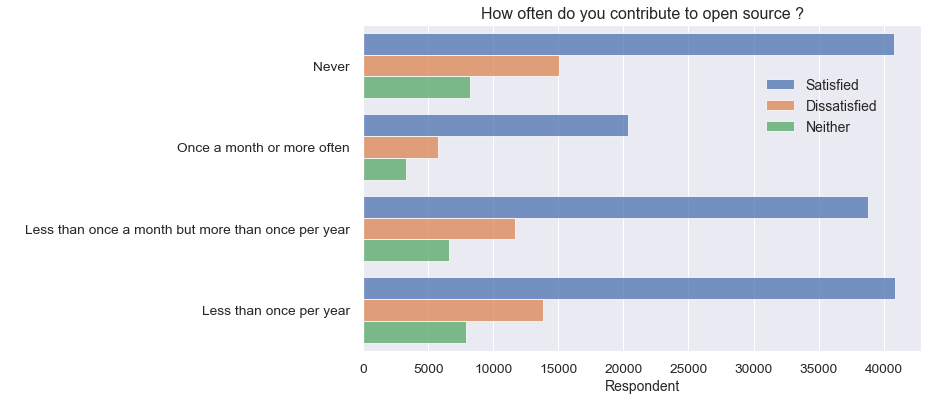

In [618]:
#Data visualisation

plt.figure(figsize=(10,6))
sns.set(font_scale=1.25)
ax = sns.countplot(data = lan, y = lan['OpenSourcer'],hue =lan['JobSat'],alpha=.75,saturation=1)
plt.legend(prop={'size': 14}, title_fontsize='40',loc='center left', bbox_to_anchor=(0.7, 0.5, 0.8, 0.5))
plt.xlabel("Respondent", fontsize = 14)
plt.ylabel(" ")
plt.title('How often do you contribute to open source ?', size = 16)

plt.show()


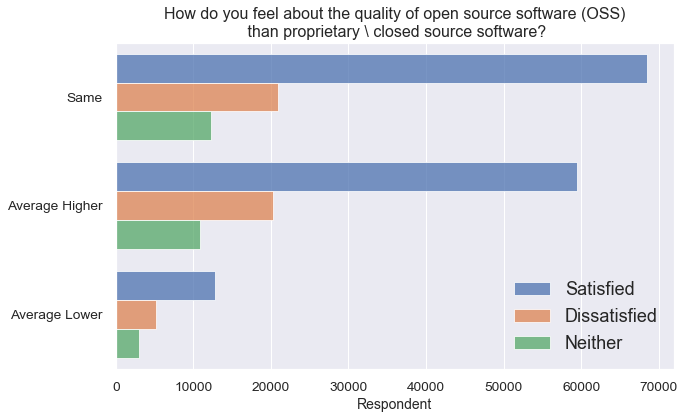

In [617]:
#Data visualisation
plt.figure(figsize=(10,6))
sns.set(font_scale=1.25)
ax1 = sns.countplot(data = lan, y = lan['OpenSource'],hue =lan['JobSat'],alpha=.75,saturation=1 )
plt.legend(fontsize='large', title_fontsize='40')
plt.xlabel("Respondent", fontsize = 14)
plt.ylabel("", fontsize = 14)
plt.title('How do you feel about the quality of open source software (OSS)\n than proprietary \ closed source software?', size = 16)

plt.show()

## Q2 - How data people are using Stackoverflow ?

In [408]:
# Data preparation
#Split DevType column
q2 = col_split(public,'DevType', sep=';')
#query the data 
q2 = q2[(q2.DevType =='Data scientist or machine learning specialist')
           | (q2.DevType =='Database administrator') |
            (q2.DevType =='Data or business analyst')
           ]
#drop missing values
q2=q2[['DevType','SOVisit1st','SOVisitFreq','SOVisitTo','SOFindAnswer','SOTimeSaved','SOHowMuchTime',
      'SOAccount','SOPartFreq','SOJobs','EntTeams','SOComm','WelcomeChange','SONewContent']].dropna()
q2.head()

,DevType,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent
5,Data or business analyst,2011,A few times per month or weekly,Find answers to specific questions,Less than once per week,Stack Overflow was slightly faster,60+ minutes,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...
5,Data scientist or machine learning specialist,2011,A few times per month or weekly,Find answers to specific questions,Less than once per week,Stack Overflow was slightly faster,60+ minutes,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...
5,Database administrator,2011,A few times per month or weekly,Find answers to specific questions,Less than once per week,Stack Overflow was slightly faster,60+ minutes,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...
12,Data or business analyst,2011,Multiple times per day,Find answers to specific questions,More than 10 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...
12,Database administrator,2011,Multiple times per day,Find answers to specific questions,More than 10 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...


In [354]:
#more queries
query_DBA = q2[['SOVisit1st','DevType']][q2.DevType =='Data or business analyst']
query_DA = q2[['SOVisit1st','DevType']][q2.DevType =='Database administrator']
query_DS = q2[['SOVisit1st','DevType']][q2.DevType =='Data scientist or machine learning specialist']

In [352]:
#some aggregation 
data_analyst = query_DBA.groupby(['SOVisit1st']).count()
data_administrator = query_DA.groupby(['SOVisit1st']).count()
data_scientist = query_DS.groupby(['SOVisit1st']).count()

In [387]:
#renmaing the columns name
data_analyst.rename(columns={'DevType':'Data or business analyst'},inplace=True)
data_administrator.rename(columns={'DevType':'Database administrator'},inplace=True)
data_scientist.rename(columns={'DevType':'Data scientist or machine learning specialist'},inplace=True)

In [434]:
#merging Data 
total = data_analyst.merge(data_administrator,on='SOVisit1st').merge(data_scientist,on='SOVisit1st')

In [436]:
#drop useless rows 
total.drop(total.index[len(total)-1],inplace=True)
total

,Data or business analyst,Database administrator,Data scientist or machine learning specialist
SOVisit1st,,,
2008,414,709,355
2009,232,420,231
2010,403,685,374
2011,269,433,310
2012,357,542,343
2013,271,435,318
2014,269,360,310
2015,263,313,277
2016,216,252,210


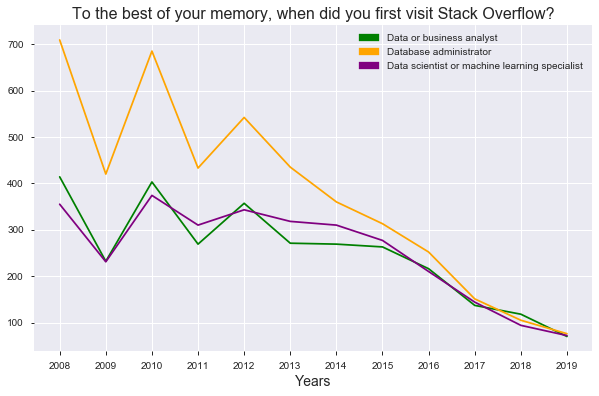

In [437]:
#data visualisation 
plt.figure(figsize=(10,6))
plt.plot(total['Data or business analyst'],color = 'green')
plt.plot(total['Database administrator'],color = 'orange')
plt.plot(total['Data scientist or machine learning specialist'],color = 'purple')
plt.title('To the best of your memory, when did you first visit Stack Overflow?', size = 16)
colors = ["green", "orange",'purple']
texts = ["Data or business analyst", "Database administrator",'Data scientist or machine learning specialist']
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(1, 1), ncol=1 )
plt.xlabel('Years',size = 14)
plt.grid(True)


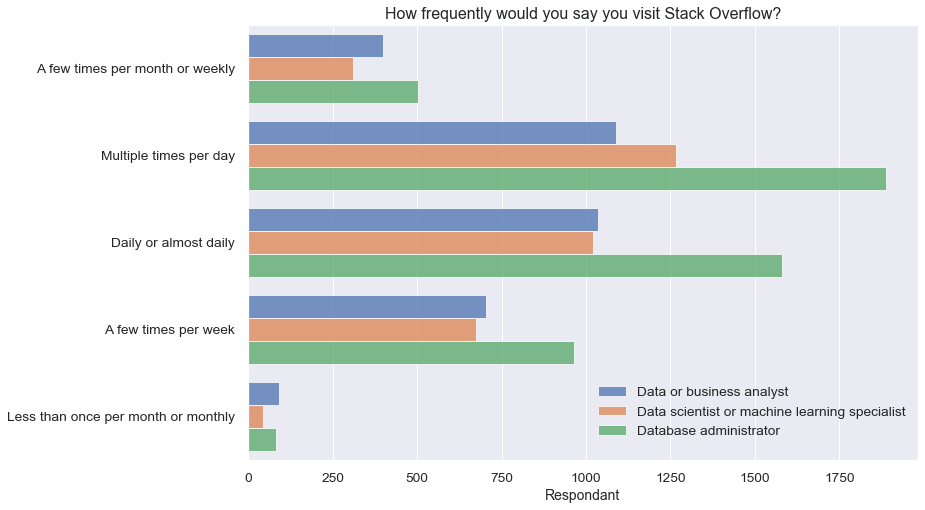

In [642]:
plt.figure(figsize=(12,8))
axt = sns.countplot(data = q2, y = q2['SOVisitFreq'],hue =q2['DevType'],alpha=.75,saturation=1  )
plt.legend( title_fontsize='40',loc='center right', bbox_to_anchor=(0.4, 0.01, 0.6, 0.2))
plt.xlabel("Respondant", fontsize = 14)
plt.ylabel("", fontsize = 14)
plt.title('How frequently would you say you visit Stack Overflow?', size = 16)
plt.show()

## Q3 - What data people's salary related to ?

In [562]:
#doing some data wragling
df_q3  = col_split(public,'DevType', sep=';')
df_q3 = df_q3[(df_q3.DevType =='Data scientist or machine learning specialist')
           | (df_q3.DevType =='Database administrator') |
            (df_q3.DevType =='Data or business analyst')
           ].dropna()
df_q3 = df_q3.rename(columns={'CompTotal':'Salary'})

In [563]:
#calculate the correlation 
corr = df_q3.corr()

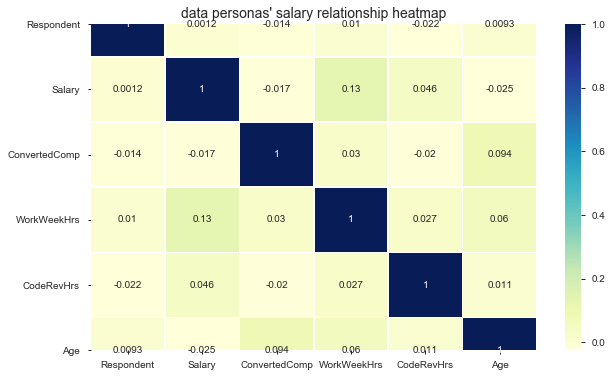

In [566]:
# the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr,linewidths=.5,cmap="YlGnBu",annot=True)
plt.title('data personas\' salary relationship heatmap', size = 14)
plt.ylabel('')
plt.show()